## Principle of minimum total potential energy with trial function ##

![figuur 1](./data_Example_lecture_6_potential_energy_varying_EA/example_lecture_6_potential_energy_varying_EA.gif)


## Solving use trial function

With trial function:

In [1]:
import sympy as sym
EA_0, a, x, L, F = sym.symbols('EA_0, a, x, L, F')
EA = 2 * EA_0 / (2 - x / L)
u_trial = a * (1 - x / L)
display(u_trial)

a*(1 - x/L)

And strain energy:

In [2]:
eps_trial = u_trial.diff(x)
Ev = sym.simplify(sym.integrate( EA * eps_trial**2 / 2,(x,0,L)))
display(Ev)

EA_0*a**2*log(2)/L

And total potential energy:

In [3]:
V = Ev  - F * u_trial.subs(x,0)
display(V)
eq1 = sym.Eq(sym.diff(V,a),0)

EA_0*a**2*log(2)/L - F*a

Solving for $a$ gives:

In [4]:
a_sol = sym.solve(eq1,a)[0]
u_trial_subs = u_trial.subs(a,a_sol)
display(u_trial_subs)

F*L*(1 - x/L)/(2*EA_0*log(2))

## Solving with ODE ##

In [5]:
u = sym.Function('u')
EA = 2 * EA_0 / (2 - x / L)

The ODE is defined as:

In [6]:
DV = sym.Eq((EA*u(x).diff(x)).diff(x),0)
display(DV)

Eq(2*EA_0*Derivative(u(x), (x, 2))/(2 - x/L) + 2*EA_0*Derivative(u(x), x)/(L*(2 - x/L)**2), 0)

The general solution of this ODE is:

In [7]:
C1, C2 = sym.symbols('C1, C2')
u_sol = sym.dsolve(DV,u(x)).rhs
display(u_sol)

C1 + 2*C2*L*x - C2*x**2/2

Solving for the boundary conditions gives:

In [8]:
eps = u_sol.diff(x)
N = EA * eps
eq1 = sym.Eq(N.subs(x,0),-F)
eq2 = sym.Eq(u_sol.subs(x,L),0)
sol = sym.solve((eq1,eq2),(C1,C2))
u_subs = u_sol.subs(sol)
display(u_subs)

3*F*L/(4*EA_0) - F*x/EA_0 + F*x**2/(4*EA_0*L)

## Comparison 

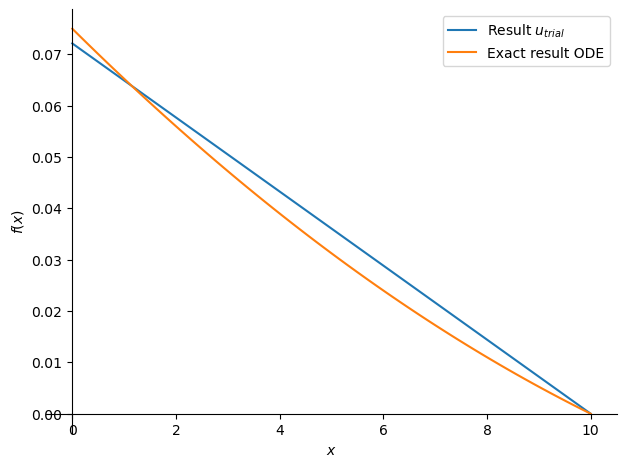

In [9]:
p0 = sym.plot(u_trial_subs.subs([(F,10),(EA_0,1000),(L,10)]), (x , 0 , 10),label='Result $u_{trial}$',legend=True,show=False)
p1 = sym.plot(u_subs.subs([(F,10),(EA_0,1000),(L,10)]), (x , 0 , 10),label='Exact result ODE',show=False)
p0.append(p1[0])
p0.show()